In [1]:
import csv
import numpy as np
import numpy.random as random
import matplotlib.ticker
import matplotlib.pyplot as plt
import pandas as pd
import sys
import os
import json
import ndjson

Import the field lengths table as a dataframe

In [16]:
length_df = pd.read_csv('dumps/output.csv')
# print(length_df.head())

In [11]:
def compute_histogram_bins(data, desired_bin_size, max_size):
    min_val = np.min(data)
    max_val = max_size or np.max(data)
    min_boundary = -1.0 * (min_val % desired_bin_size - min_val)
    max_boundary = max_val - max_val % desired_bin_size + desired_bin_size
    n_bins = int((max_boundary - min_boundary) / desired_bin_size) + 1
    bins = np.linspace(min_boundary, max_boundary, n_bins)
    return bins
    
def generate_subplot(data, field_name, bin_size, max_size):
    data_to_plot = data[field_name]
    bins_max = compute_histogram_bins(data_to_plot, bin_size, max_size)
    bins_full = compute_histogram_bins(data_to_plot, bin_size, max_size=None)

    # Show inset charts
    fig, axes1 = plt.subplots()
    st = fig.suptitle(
        f"Length Distribution field '{field_name}' across Object API", fontsize="x-large")

    # These are in unitless percentages of the figure size. (0,0 is bottom left)
    left, bottom, width, height = [0.55, 0.5, 0.3, 0.3]
    axes1.hist(data_to_plot[data_to_plot != 0], color=[
        'orange'], bins=bins_max, alpha=0.5, histtype='stepfilled')
    axes2 = plt.axes([left, bottom, width, height])
    axes2.hist(data_to_plot[data_to_plot != 0], color=[
        'green'], bins=bins_full, alpha=0.5, histtype='stepfilled')

    # Add labels
    axes1.set(xlabel="Field Length", ylabel="Frequency")
    axes2.set_title("Full Distribution", fontsize=9)
    axes1.legend([field_name], loc="lower right")

Generate a histogram for 'summary' with arguments for generate_subplot(data, field_name, bin_size, max_size)

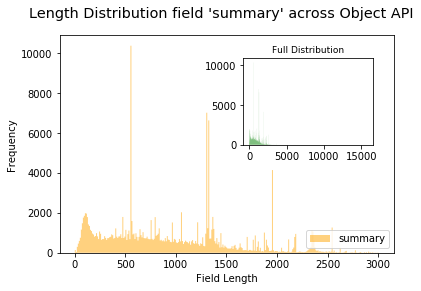

In [15]:
generate_subplot(length_df, 'summary',
                               10, 3000)
plt.show()                              

Find object id's for fields of specific lengths

In [17]:
df_int = length_df[length_df['summary'] == 550]

print(df_int[['UniqueID', 'summary']])

UniqueID  summary
15102    O1463267      550
37420     O258181      550
59282     O232966      550
62467     O229639      550
62611     O229481      550
...           ...      ...
1152279   O350049      550
1157131   O345034      550
1182166   O313638      550
1183198   O312583      550
1191070   O297665      550

[9567 rows x 2 columns]


Generate a barchart for data completion across object fields

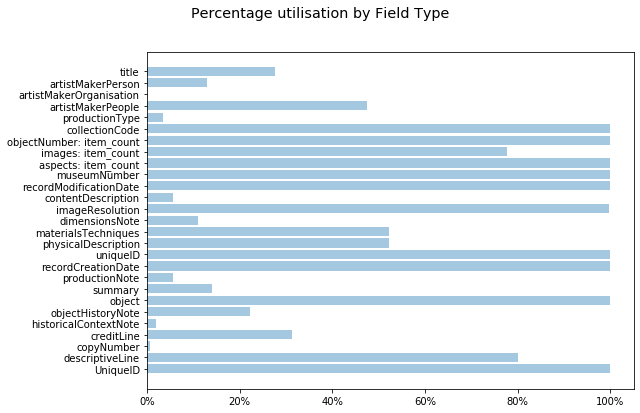

In [19]:
def generate_barchart(data):
    # print(np.count_nonzero(data, axis=0))
    # print(data.astype(bool).sum(axis=0))
    names = data.columns
    fig = plt.figure(figsize=(9, 6))
    st = fig.suptitle(
        "Percentage utilisation by Field Type", fontsize="x-large", verticalalignment='top')
    ax = fig.add_subplot(111)
    yvals = range(len(names))
    values = (np.count_nonzero(data, axis=0)) / \
        max(np.count_nonzero(data, axis=0)) * 100
    ax.barh(yvals, values, align='center', alpha=0.4)
    plt.yticks(yvals, names)
    x_formatter = matplotlib.ticker.PercentFormatter()
    ax.xaxis.set_major_formatter(x_formatter)
    plt.tight_layout(rect=[0, 0.03, 1, 0.90])

generate_barchart(length_df)
plt.show() 

Assorted field extraction methods:

In [20]:
# Nested field extraction methods


def title(object):
    if not object['title'] or not object['title'][0]:
        return ''
    else:
        return object['title'][0]['title']


def people(object):
    if not object['artistMakerPeople'] or not object['artistMakerPeople'][0]:
        return ''
    else:
        return object['artistMakerPeople'][0]['name']['text']


def person(object):
    if not object['artistMakerPerson'] or not object['artistMakerPerson'][0]:
        return ''
    else:
        return object['artistMakerPerson'][0]['name']['text']


def organisation(object):
    if not object['artistMakerOrganisation'] or not object['artistMakerOrganisation'][0]:
        return ''
    else:
        return object['artistMakerOrganisation'][0]['name']['text']

Output data to csv where 'summary' is a specific length

In [23]:
def summary_len(object, length):
    return len(object['summary']) == length


def csv_data(object, length):
    if summary_len(object, length):
        line = [object['summary']]
        line.insert(0, object['uniqueID'])
        return line

def objects_from_file(path):
    with open(path, "r") as f:
        objects_load = ndjson.load(f)
        return objects_load

In [25]:

length_of_interest = 550
output_file_name = 'dumps/summary_550_v2.csv'
data_input = 'data_all/'

for dirpath, dirnames, files in os.walk(data_input, topdown=False):
    print(f'Found directory: {dirpath}')
    for input_file_name in files:
        print('Filename: ', input_file_name)
        objects = objects_from_file(
            dirpath+input_file_name)

        with open(output_file_name, "a", newline='') as f:
            writer = csv.writer(f, delimiter=',')
            # writer.writerow(csv_header)  # write the header
            # write the actual content line by line
            for object_dump in objects:
                line = csv_data(object_dump, length_of_interest)
                if line:
                    writer.writerow(line)

Found directory: data_all/
Filename:  objects-all-14-Aug-2019.0.jsonl
Filename:  objects-all-14-Aug-2019.10000.jsonl
Filename:  objects-all-14-Aug-2019.100000.jsonl
Filename:  objects-all-14-Aug-2019.1000000.jsonl
Filename:  objects-all-14-Aug-2019.1010000.jsonl
Filename:  objects-all-14-Aug-2019.1020000.jsonl
Filename:  objects-all-14-Aug-2019.1030000.jsonl
Filename:  objects-all-14-Aug-2019.1040000.jsonl
Filename:  objects-all-14-Aug-2019.1050000.jsonl
Filename:  objects-all-14-Aug-2019.1060000.jsonl
Filename:  objects-all-14-Aug-2019.1070000.jsonl
Filename:  objects-all-14-Aug-2019.1080000.jsonl
Filename:  objects-all-14-Aug-2019.1090000.jsonl
Filename:  objects-all-14-Aug-2019.110000.jsonl
Filename:  objects-all-14-Aug-2019.1100000.jsonl
Filename:  objects-all-14-Aug-2019.1110000.jsonl
Filename:  objects-all-14-Aug-2019.1120000.jsonl
Filename:  objects-all-14-Aug-2019.1130000.jsonl
Filename:  objects-all-14-Aug-2019.1140000.jsonl
Filename:  objects-all-14-Aug-2019.1150000.jsonl
Fil